### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x
# tf.set_random_seed(42)

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [61]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

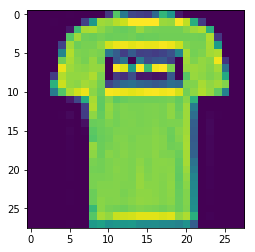

In [12]:
# Show one of the images from the training dataset
plt.imshow(trainX[1])

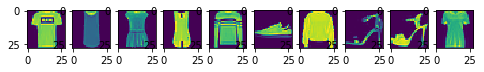

label for each of the above image:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
fig=plt.figure(figsize=(8,8))
for i in range(1, 11):
    fig.add_subplot(1, 10, i) #rows,column
    plt.imshow(trainX[i])
plt.show()
print("label for each of the above image:")
print(trainY[:11])

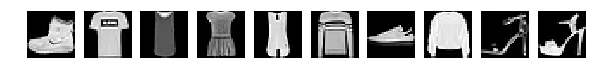

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
def buildModel_one_layer():
    # Initialize Sequential model
    model = tf.keras.models.Sequential()

    # Reshape data from 2D to 1D -> 28x28 to 784
    model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

    #Add 1st hidden layer
    model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

    #Add OUTPUT layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

In [0]:
model_one_layer = buildModel_one_layer()

In [70]:
model_one_layer.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_one_layer.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(lr=0.03),
             metrics=['accuracy'])

In [0]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [0]:
plot_model(model_one_layer, to_file='model.png')
SVG(model_to_dot(model_one_layer).create(prog='dot', format='svg'))

### Execute the model using model.fit()

In [77]:
model_one_layer.fit(trainX, trainY,
                  batch_size=64,
                  epochs=30,
                  verbose=1,
                  validation_data=(x_test, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.8670 - accuracy: 0.7124 - val_loss: 1.1747 - val_accuracy: 0.6014
Epoch 2/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6968 - accuracy: 0.7534 - val_loss: 0.9199 - val_accuracy: 0.7350
Epoch 3/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6876 - accuracy: 0.7534 - val_loss: 0.8475 - val_accuracy: 0.7337
Epoch 4/30
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6681 - accuracy: 0.7615 - val_loss: 0.7768 - val_accuracy: 0.7631
Epoch 5/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6655 - accuracy: 0.7599 - val_loss: 0.7662 - val_accuracy: 0.7458
Epoch 6/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6518 - accuracy: 0.7643 - val_loss: 0.7734 - val_accuracy: 0.7238
Epoch 7/30
60000/60000 [==============================] 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
def buildModel_with_batch_norm():
    # Initialize Sequential model
    model = tf.keras.models.Sequential()

    # Reshape data from 2D to 1D -> 28x28 to 784
    model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

    # Normalize the data
    model.add(tf.keras.layers.BatchNormalization())

    #Add 1st hidden layer
    model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

    #Add 2nd hidden layer
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

    #Add 3rd hidden layer
    model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

    #Add OUTPUT layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

In [0]:
model_with_batch_norm = buildModel_with_batch_norm()

In [80]:
model_with_batch_norm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_16 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                610       
Total params: 186,906
Trainable params: 185,338
Non-trainable params: 1,568
____________________________________________

In [0]:
model_with_batch_norm.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(lr=0.03),
             metrics=['accuracy'])

### Execute the model

In [82]:
model_with_batch_norm.fit(trainX, trainY,
                  batch_size=64,
                  epochs=30,
                  verbose=1,
                  validation_data=(x_test, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 81us/sample - loss: 1.9371 - accuracy: 0.4277 - val_loss: 2.4698 - val_accuracy: 0.1000
Epoch 2/30
60000/60000 [==============================] - 4s 68us/sample - loss: 1.1702 - accuracy: 0.6398 - val_loss: 2.6223 - val_accuracy: 0.1000
Epoch 3/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.8451 - accuracy: 0.7214 - val_loss: 2.9082 - val_accuracy: 0.1000
Epoch 4/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6916 - accuracy: 0.7487 - val_loss: 3.1910 - val_accuracy: 0.1000
Epoch 5/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6196 - accuracy: 0.7701 - val_loss: 3.2461 - val_accuracy: 0.1000
Epoch 6/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5711 - accuracy: 0.7932 - val_loss: 3.2651 - val_accuracy: 0.1000
Epoch 7/30
60000/60000 [==============================] 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
model_with_batch_norm_2 = buildModel_with_batch_norm()

In [0]:
model_with_batch_norm_2.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(lr=0.001),
             metrics=['accuracy'])

In [85]:
model_with_batch_norm_2.fit(trainX, trainY,
                  batch_size=64,
                  epochs=30,
                  verbose=1,
                  validation_data=(x_test, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 78us/sample - loss: 2.3954 - accuracy: 0.1000 - val_loss: 2.3220 - val_accuracy: 0.1000
Epoch 2/30
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2958 - accuracy: 0.1265 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 3/30
60000/60000 [==============================] - 4s 68us/sample - loss: 2.2771 - accuracy: 0.2697 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 4/30
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2640 - accuracy: 0.3167 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 5/30
60000/60000 [==============================] - 4s 67us/sample - loss: 2.2502 - accuracy: 0.3502 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 6/30
60000/60000 [==============================] - 4s 68us/sample - loss: 2.2353 - accuracy: 0.3613 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 7/30
60000/60000 [==============================] 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
def buildModel_with_three_layer():
    # Initialize Sequential model
    model = tf.keras.models.Sequential()

    # Reshape data from 2D to 1D -> 28x28 to 784
    model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

    # Normalize the data
    model.add(tf.keras.layers.BatchNormalization())
# 157000
# 10010010
    #Add 1st hidden layer
    model.add(tf.keras.layers.Dense(2000, activation='sigmoid'))

    #Add 2nd hidden layer
    model.add(tf.keras.layers.Dense(2000, activation='sigmoid'))

    #Add 3rd hidden layer
    model.add(tf.keras.layers.Dense(2000, activation='sigmoid'))

    #Add OUTPUT layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

In [0]:
model_with_three_layer = buildModel_with_three_layer()

In [0]:
model_with_three_layer.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(lr=0.03),
             metrics=['accuracy'])

## Review model

In [91]:
model_with_three_layer.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_24 (Dense)             (None, 2000)              1570000   
_________________________________________________________________
dense_25 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dense_26 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dense_27 (Dense)             (None, 10)                20010     
Total params: 9,597,146
Trainable params: 9,595,578
Non-trainable params: 1,568
_______________________________________

### Run the model

In [90]:
model_with_three_layer.fit(trainX, trainY,
                  batch_size=64,
                  epochs=30,
                  verbose=1,
                  validation_data=(x_test, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 92us/sample - loss: 1.6232 - accuracy: 0.4112 - val_loss: 3.7802 - val_accuracy: 0.1000
Epoch 2/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.7919 - accuracy: 0.7062 - val_loss: 4.0490 - val_accuracy: 0.1000
Epoch 3/30
60000/60000 [==============================] - 5s 77us/sample - loss: 0.6617 - accuracy: 0.7490 - val_loss: 3.6947 - val_accuracy: 0.1000
Epoch 4/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.6023 - accuracy: 0.7758 - val_loss: 3.9832 - val_accuracy: 0.1000
Epoch 5/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5640 - accuracy: 0.7932 - val_loss: 3.8509 - val_accuracy: 0.1000
Epoch 6/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5350 - accuracy: 0.8040 - val_loss: 3.8352 - val_accuracy: 0.1000
Epoch 7/30
60000/60000 [==============================] 